In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
calories_df = pd.read_csv('../Datasets/calories.csv')

In [3]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_df = pd.read_csv('../Datasets/exercise.csv')

In [5]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise_df['Calories'] = calories_df['Calories']

In [7]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
exercise_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
exercise_df.shape

(15000, 9)

In [10]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
df = exercise_df.replace({'Gender':{'male':1,'female':0}})

C:\Users\Jash\AppData\Local\Temp\ipykernel_20840\1358934140.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = exercise_df.replace({'Gender':{'male':1,'female':0}})


In [14]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
correlation = df.corr()

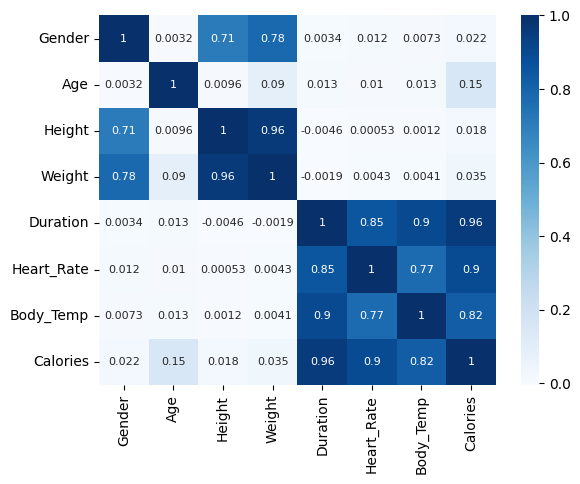

In [20]:
sns.heatmap(correlation,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [18]:
df = df.drop(columns='User_ID',axis=1)

In [21]:
X = df.drop(columns='Calories',axis=1)

Y = df.Calories

In [22]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [23]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [29]:
model = RandomForestRegressor()

In [30]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
train_pred = model.predict(X_train)

r2_train = metrics.r2_score(Y_train,train_pred)
mse_train = metrics.mean_squared_error(Y_train,train_pred)

print(r2_train)
print(mse_train)

0.9997036519965552
1.1584866416666664


In [32]:
test_pred = model.predict(X_test)

r2_test = metrics.r2_score(Y_test,test_pred)
mse_test = metrics.mean_squared_error(Y_test,test_pred)

print(r2_test)
print(mse_test)

0.9979490145990981
7.9294393


In [33]:
input = (0,22,177.0,71.0,10.0,93.0,39.8)
input_np = np.asarray(input)

input_reshape = input_np.reshape(1,-1)

predict = model.predict(input_reshape)

print(predict[0])

44.96


C:\Users\Jash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Test and train results visualization

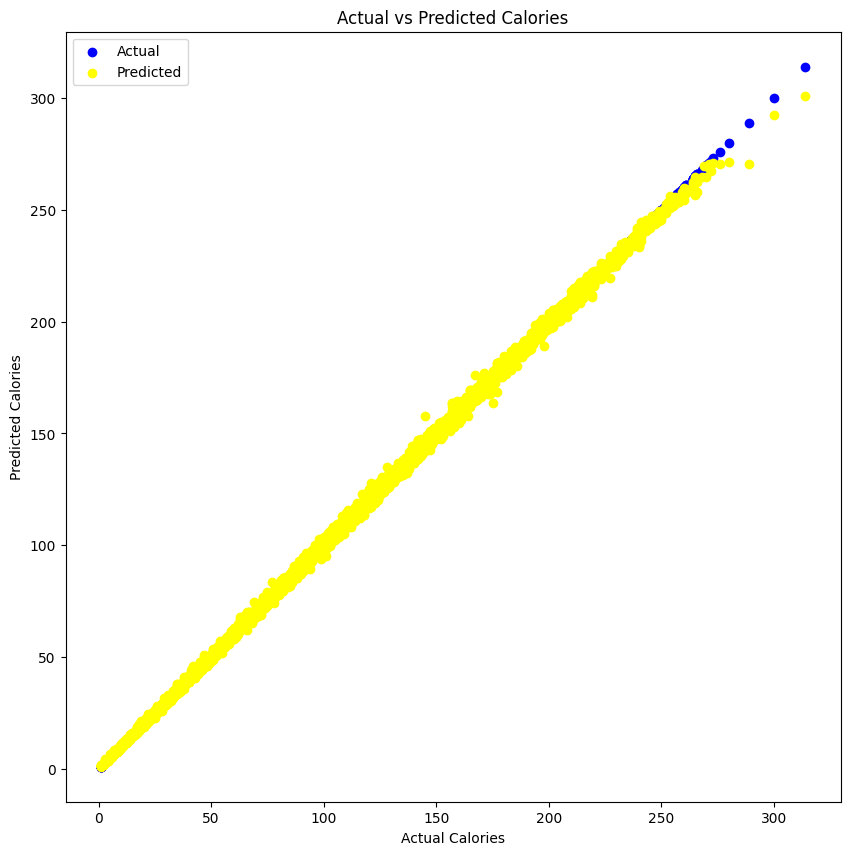

In [37]:
plt.figure(figsize=(10,10))

# Plot actual values (Y_train) in blue
plt.scatter(Y_train, Y_train, color='blue', label='Actual')

# Plot predicted values (train_pred) in red
plt.scatter(Y_train, train_pred, color='yellow', label='Predicted')

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.legend()
plt.show()


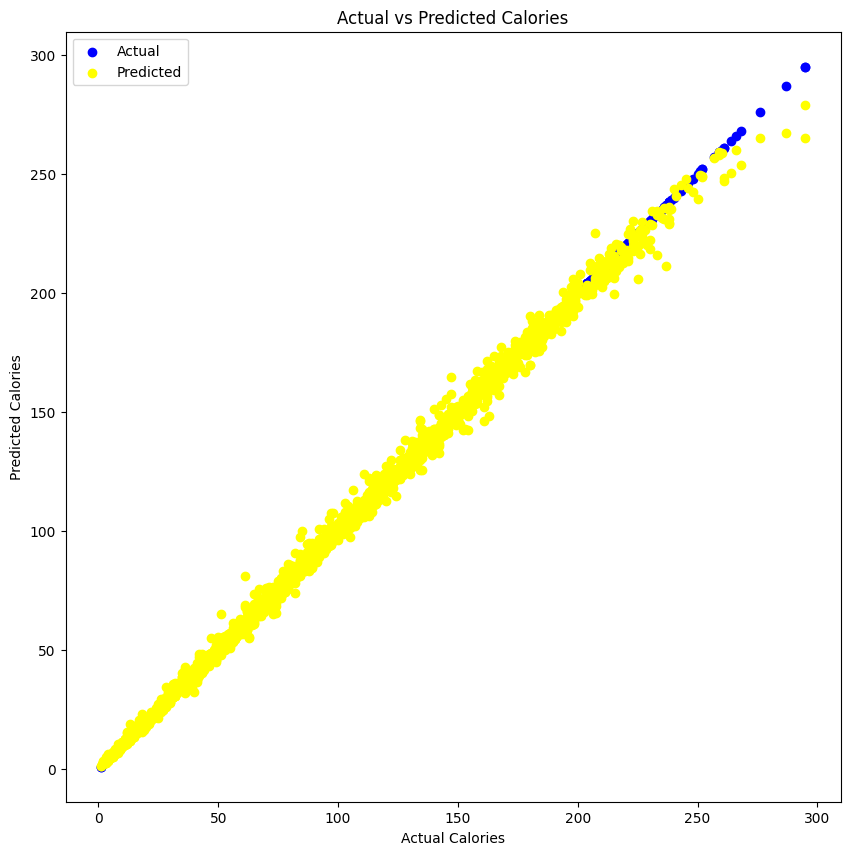

In [38]:
plt.figure(figsize=(10,10))

# Plot actual values (Y_train) in blue
plt.scatter(Y_test, Y_test, color='blue', label='Actual')

# Plot predicted values (train_pred) in red
plt.scatter(Y_test, test_pred, color='yellow', label='Predicted')

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.legend()
plt.show()
